In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import numpy as np


## Load data

In [4]:
movies_df = pd.read_csv('movies.csv')
movies_df.head(5)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_df = pd.read_csv('ratings.csv')
ratings_df.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## User2 Subset

In [6]:
u2ratings = ratings_df[ratings_df['userId'] == 2]
u2ratings


,userId,movieId,rating,timestamp
232,2,318,3.0,1445714835
233,2,333,4.0,1445715029
234,2,1704,4.5,1445715228
235,2,3578,4.0,1445714885
236,2,6874,4.0,1445714952
237,2,8798,3.5,1445714960
238,2,46970,4.0,1445715013
239,2,48516,4.0,1445715064
240,2,58559,4.5,1445715141
241,2,60756,5.0,1445714980


## Number of movies watched by user2

In [7]:
nm = u2ratings.shape[0]
print("Number of movies watched by user2: ", nm)

Number of movies watched by user2:  29


## User 2 ratings bar chart 

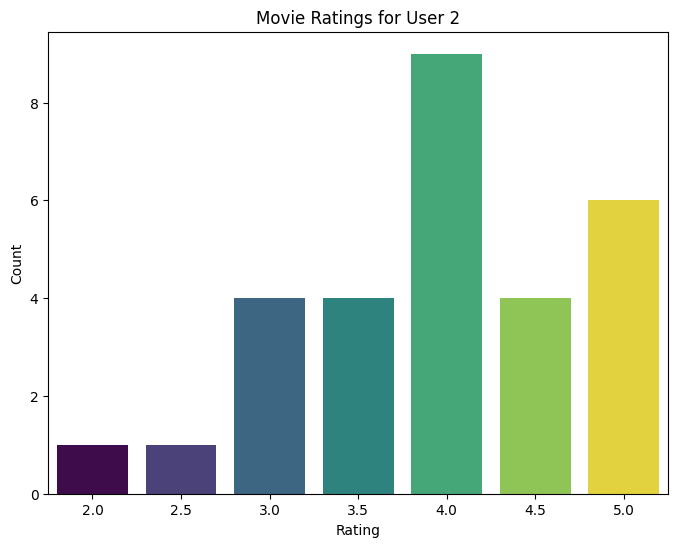

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=u2ratings, palette='viridis', hue='rating', legend=False)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Movie Ratings for User 2')
plt.show()


This bar chart is created using Seaborn's countplot function. It visualizes the distribution of movie ratings for User 2.

**X-axis (x='rating')** - Represents the different rating values, could be 1 star, 2 stars, 3 stars, etc.

**Y-axis (y='Count')** - Represents the count of each rating. Each bar's height indicates how many movies User 2 has rated with a particular rating.

**Color Palette (palette='viridis')** - Specifies the color palette used for the bars. 

**Figure Size (plt.figure(figsize=(8, 6)))** - Sets the dimensions of the plot, where the width is 8 units and the height is 6 units.


The bars in the chart represent different ratings, and the height of each bar corresponds to the number of movies rated by User 2 with that specific rating.

## Other EDA - Distribution of movie genres

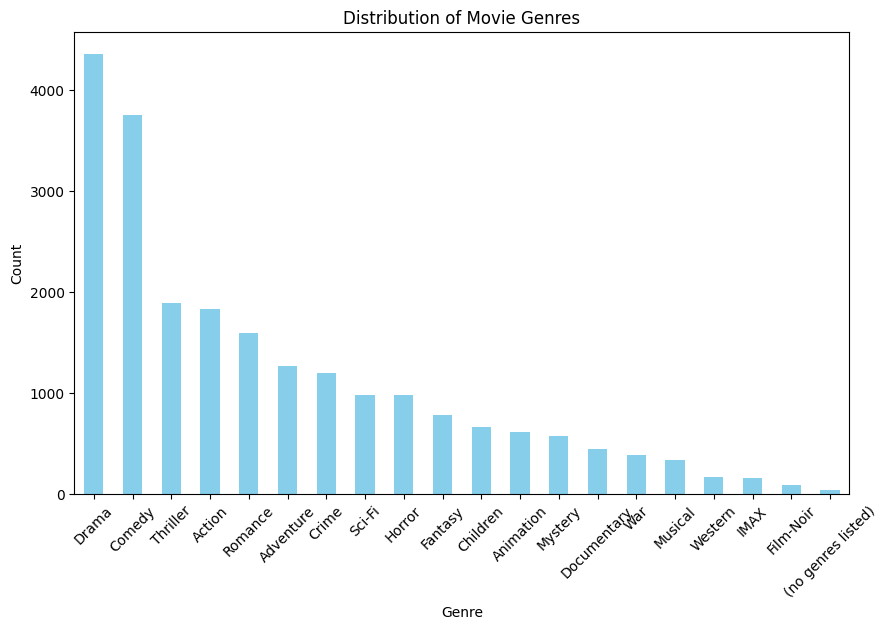

In [9]:

plt.figure(figsize=(10, 6))
gc = movies_df['genres'].str.split('|', expand=True).stack().value_counts()
gc.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45)
plt.show()

The bar plot visualizes the distribution of movie genres in the dataset, showing the count of movies for each genre. This can help in understanding the diversity and popularity of different genres in the given dataset.

## Top movies for user2

In [10]:
topmovies = u2ratings[u2ratings['rating'] >= 4.5].merge(movies_df, on='movieId')[['title', 'rating']].sort_values(by='rating', ascending=False)
print("User 2's top movies:")
print(topmovies)

User 2's top movies:
                                               title  rating
2                               Step Brothers (2008)     5.0
5                                  Inside Job (2010)     5.0
6                                     Warrior (2011)     5.0
7                    Wolf of Wall Street, The (2013)     5.0
8                          Mad Max: Fury Road (2015)     5.0
9  The Jinx: The Life and Deaths of Robert Durst ...     5.0
0                           Good Will Hunting (1997)     4.5
1                            Dark Knight, The (2008)     4.5
3                        Inglourious Basterds (2009)     4.5
4                                   Town, The (2010)     4.5


## Most similar user to user 2 using cosine and Euclidean distances

In [11]:
u2vector = u2ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
all_users_vector = ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

cmn_columns = u2vector.columns.intersection(all_users_vector.columns)

u2vector = u2vector[cmn_columns]
all_users_vector = all_users_vector[cmn_columns]

In [12]:
cos_similarity = cosine_similarity(u2vector, all_users_vector) 
euclidean_distances = euclidean_distances(u2vector, all_users_vector)

print(f"Most similar user to User 2 (cosine): {cos_similarity}")
print(f"Most similar user to User 2 (euclidean): {euclidean_distances}")


Most similar user to User 2 (cosine): [[0.26086186 1.         0.         0.20751434 0.13834289 0.22825413
  0.24495082 0.13834289 0.         0.35144117 0.24455799 0.
  0.18445719 0.13834289 0.49455168 0.39615764 0.43027895 0.77644315
  0.2557961  0.18445719 0.60584711 0.46293651 0.18445719 0.48089623
  0.46106757 0.         0.         0.47295934 0.38972905 0.37121293
  0.         0.13834289 0.24846359 0.23045899 0.         0.23518292
  0.13834289 0.13834289 0.         0.13834289 0.58971767 0.35410056
  0.13834289 0.         0.33206224 0.13834289 0.33328977 0.
  0.26687054 0.61863671 0.26809823 0.55354535 0.         0.13834289
  0.18445719 0.22134863 0.27207436 0.22825413 0.         0.24846359
  0.22325714 0.77977403 0.57293207 0.38879219 0.46973355 0.39010257
  0.3432886  0.83476077 0.22825413 0.24455799 0.         0.13834289
  0.60259073 0.18445719 0.         0.49600239 0.34992614 0.13834289
  0.18445719 0.53635901 0.13834289 0.18445719 0.38615679 0.13834289
  0.20751434 0.35609211 0.

`Cosine Similarity`

The cosine similarity scores range between 0 and 1, where 1 indicates perfect similarity.
Users with higher cosine similarity scores are more similar to User 2 in terms of their preferences or behaviors.


`Euclidean Distance`

The Euclidean distance scores represent dissimilarity, with lower values indicating higher similarity.
Users with lower Euclidean distances are more similar to User 2 in terms of their preferences or behaviors.
The most similar user has a Euclidean distance of 0 (perfect similarity), and others have distances ranging from approximately 13.73 to 21.69.

## Most similar user

In [13]:
cos_similarity[:, 1] = -1 
euclidean_distances[:, 1] = np.inf 


In [14]:

ms_cos_index = np.argmax(cos_similarity)
ms_cos_score = cos_similarity[0, ms_cos_index]

print(f"Most similar user to User 2 (cosine): User {ms_cos_index + 1} with similarity score {ms_cos_score}")


Most similar user to User 2 (cosine): User 599 with similarity score 0.8413852739119481


In [15]:
ms_euclidean_index = np.argmin(euclidean_distances)
ms_euclidean_distance = euclidean_distances[0, ms_euclidean_index]

print(f"Most similar user to User 2 (euclidean): User {ms_euclidean_index + 1} with distance {ms_euclidean_distance}")

Most similar user to User 2 (euclidean): User 599 with distance 11.926860441876563


## Movies rated by the most similar user as user2

In [16]:

most_similar_user_ratings = ratings_df[ratings_df['userId'] == (ms_cos_index + 1)]

# Merge with movies_df to include movie details
most_similar_user_ratings_with_details = most_similar_user_ratings.merge(movies_df, on='movieId')

print("Movies rated by the most similar user:")
print(most_similar_user_ratings_with_details)


Movies rated by the most similar user:
      userId  movieId  rating   timestamp  \
0        599        1     3.0  1498524204   
1        599        2     2.5  1498514085   
2        599        3     1.5  1498505071   
3        599        6     4.5  1498539623   
4        599        7     2.5  1498514161   
...      ...      ...     ...         ...   
2473     599   179817     3.0  1516604716   
2474     599   180031     3.5  1518298493   
2475     599   180297     3.0  1516604804   
2476     599   181315     3.5  1517370374   
2477     599   183301     3.0  1519148271   

                                    title  \
0                        Toy Story (1995)   
1                          Jumanji (1995)   
2                 Grumpier Old Men (1995)   
3                             Heat (1995)   
4                          Sabrina (1995)   
...                                   ...   
2473                  Darkest Hour (2017)   
2474            The Shape of Water (2017)   
2475           

## Recommend movies with cosine similarity

In [17]:

user_2_recommended_movies = all_users_vector.loc[ms_cos_index]
movies_not_rated_by_user_2 = user_2_recommended_movies[user_2_recommended_movies == 0].index

# threshold rating
threshold_rating = 3.0

# Extract recommended movies information with ratings above the threshold
recommended_movies_info = movies_df[movies_df['movieId'].isin(movies_not_rated_by_user_2)]
recommended_movies_info = recommended_movies_info[['movieId', 'title']].merge(ratings_df[ratings_df['userId'] == (ms_cos_index + 1)], on='movieId')
recommended_movies_info = recommended_movies_info.rename(columns={'rating': 'user_rating'})

# Filter movies above threshold
recommended_movies_info = recommended_movies_info[recommended_movies_info['user_rating'] >= threshold_rating]

print("Movies recommended for User 2 based on similarity with User", ms_cos_index + 1, "with ratings above", threshold_rating)
print(recommended_movies_info)

Movies recommended for User 2 based on similarity with User 599 with ratings above 3.0
    movieId                              title  userId  user_rating  \
0       318   Shawshank Redemption, The (1994)     599          4.0   
2      1704           Good Will Hunting (1997)     599          4.5   
3      3578                   Gladiator (2000)     599          3.5   
4      6874           Kill Bill: Vol. 1 (2003)     599          5.0   
5      8798                  Collateral (2004)     599          3.0   
7     48516               Departed, The (2006)     599          3.0   
8     58559            Dark Knight, The (2008)     599          3.5   
10    68157        Inglourious Basterds (2009)     599          3.5   
11    71535                  Zombieland (2009)     599          3.0   
12    77455  Exit Through the Gift Shop (2010)     599          3.5   
13    80489                   Town, The (2010)     599          3.5   
14    91529      Dark Knight Rises, The (2012)     599       

This output shows the movies recommended for User 2 based on similarity with User 599, with ratings above 3.0. Each row in the output represents a recommended movie, and the columns provide details about each movie, including the movie ID, title, the user ID who rated the movie (in this case, User 599), the rating given by User 599, and the timestamp of the rating.

To achieve this output, we first calculated the most similar user to User 2 using cosine similarity ( User 599). Then, we extracted movies not rated by User 2 but rated by User 599. Next, we filtered out movies with ratings below the threshold of 3.0. Finally, we merged the information about these recommended movies with the ratings given by User 599 to provide additional details such as the movie title and the rating given by User 599.


## Analysis

The method used in this recommendation system is user-based collaborative filtering. This approach recommends items -movies - to a user based on the preferences and behavior of similar users.

The recommendations are based on the ratings of the most similar user to User 2, as determined by cosine similarity. Cosine similarity measures the cosine of the angle between two vectors and is commonly used in recommendation systems to compute the similarity between users or items.


**Movie Recommendations**

The recommended movies seem to make sense based on the ratings of User 599, who is most similar to User 2. These movies have ratings above the threshold of 3.0 and are likely to be enjoyed by User 2 since they were highly rated by a similar user.


**Choice of Similarity Metric** 

Cosine similarity was chosen as the similarity metric. Cosine similarity is effective when the magnitude of the vectors is important, as it measures the cosine of the angle between them rather than their distance. It's commonly used in recommendation systems because it captures the direction of similarity between users or items regardless of their magnitude.

**Justification of Cosine Similarity** 

Cosine similarity was chosen because it's well-suited for high-dimensional data like user-item rating matrices and is computationally efficient. It also handles sparse data well and is robust to scale differences between users. Additionally, cosine similarity considers the direction of the vectors rather than their magnitude, making it suitable for recommendation systems where the absolute ratings may not be as important as the relative preferences between users.